
# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Data Collection and Processing

In [3]:
gold_price = pd.read_csv('gld_price_data.csv')

In [4]:
#print first 5 row in the data frame
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 row in the data frame
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#getting the statistical measure of data
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#correlation
#1. positive correlation
#2. negative correlation

In [9]:
correlation = gold_price.corr()

<AxesSubplot:>

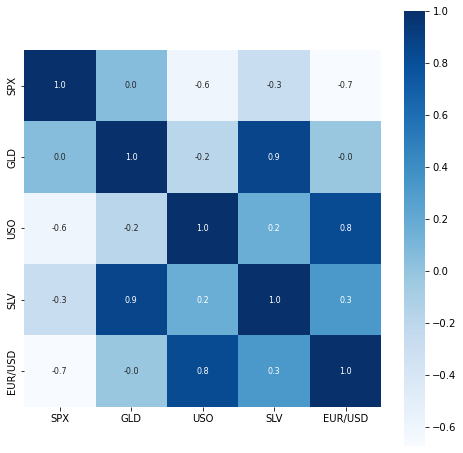

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [11]:
#correlation value of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

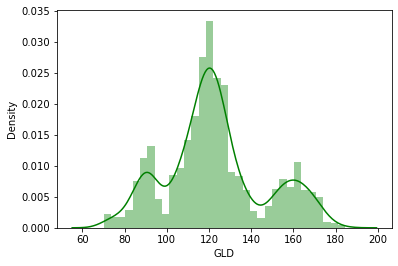

In [12]:
sns.distplot(gold_price['GLD'], color='green')

# Splitting the feature and target

In [13]:
X = gold_price.drop(['Date', 'GLD'],axis =1)
y = gold_price['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Training: Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
#training the model 1
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [21]:
test_data_prediction

array([168.1780994 ,  82.26919971, 116.22550005, 127.65230067,
       120.59020143, 154.70389785, 150.27969816, 126.22049998,
       117.49079873, 125.95810089, 116.60440123, 172.35430037,
       141.50419879, 167.52489835, 115.16359997, 117.87320087,
       138.98140321, 170.00180105, 159.03910286, 157.76659873,
       155.09010031, 125.08090059, 175.90039941, 157.14260346,
       125.1956003 ,  93.91730001,  77.01960036, 120.73980028,
       119.01129907, 167.48949956,  88.16100083, 125.14580005,
        91.20560094, 117.83689993, 121.03809902, 136.1141013 ,
       115.3652015 , 114.81930068, 147.85049942, 107.30610102,
       104.53470234,  87.37919813, 126.55920014, 118.02949983,
       153.54519868, 119.67830012, 108.32869978, 108.17699857,
        93.16940027, 127.22439754,  74.94630049, 113.64839959,
       121.02510009, 111.169499  , 118.82169871, 120.53059977,
       158.68379972, 168.79130068, 146.82739669,  85.84529871,
        94.18170029,  86.87509919,  90.64380003, 119.02

In [25]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9894806793769092


In [26]:
#compare the actual values and predicted value in a plot
y_test = list(y_test)

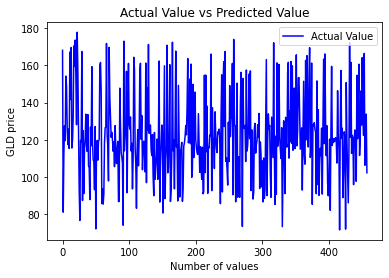

In [28]:
plt.plot(y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, 'green', label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

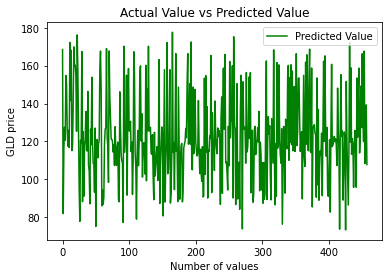

In [29]:
#plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, 'green', label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

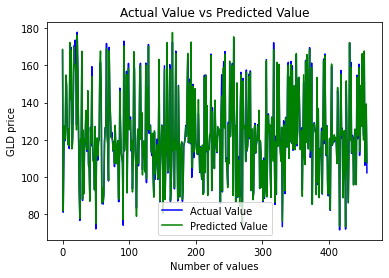

In [30]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, 'green', label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()